In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats



import seaborn as sns
from sklearn import metrics, datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [3]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("/Users/ik/QMinersHackathon42/data/features_many.csv")
df.head() #ten elo boost pro home team je divny, jako ona si to ta neuronka asi překouše, ale jestli ji nenechat, at si to odvodi sama

,orig_index,Season,Date,HID,AID,market_type,y_home_win,y_away_win,y_draw,oddsH,oddsA,elo_h,elo_a,elo_diff,elo_p_h,pts_pg_h,pts_pg_a,gd_pg_h,gd_pg_a,games_season_h,games_season_a,rest_days_h,rest_days_a,rest_diff,back_to_back_h,back_to_back_a,home_streak_h,away_streak_a,h_gf_fast,h_ga_fast,h_gf_slow,h_ga_slow,h_gf_p1_fast,h_gf_p2_fast,h_gf_p3_fast,h_ga_p1_fast,h_ga_p2_fast,h_ga_p3_fast,h_gf_p1_share,h_gf_p2_share,h_gf_p3_share,h_third_period_goal_diff,h_ot_rate_fast,h_ot_win_rate_fast,a_gf_fast,a_ga_fast,a_gf_slow,a_ga_slow,a_gf_p1_fast,a_gf_p2_fast,a_gf_p3_fast,a_ga_p1_fast,a_ga_p2_fast,a_ga_p3_fast,a_gf_p1_share,a_gf_p2_share,a_gf_p3_share,a_third_period_goal_diff,a_ot_rate_fast,a_ot_win_rate_fast,gf_fast_diff,ga_fast_diff,gf_slow_diff,ga_slow_diff,gf_p1_share_diff,gf_p2_share_diff,gf_p3_share_diff,third_period_goal_diff_diff,sog_for_fast_h,sog_against_fast_h,sog_share_fast_h,pim_for_fast_h,pim_against_fast_h,ppg_fast_h,shg_fast_h,svpct_fast_h,hits_diff_fast_h,blocks_diff_fast_h,fo_share_fast_h,sog_for_fast_a,sog_against_fast_a,sog_share_fast_a,pim_for_fast_a,pim_against_fast_a,ppg_fast_a,shg_fast_a,svpct_fast_a,hits_diff_fast_a,blocks_diff_fast_a,fo_share_fast_a,sog_share_fast_diff,pim_for_fast_diff,svpct_fast_sum,fo_share_fast_diff,h2h_win_rate_ha,h2h_goal_diff_pg_ha,h2h_games_ha
0,0,1990,1990-09-21,24,16,3way,1,0,0,1.50,2.98,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
1,1,1990,1990-09-21,15,18,3way,1,0,0,1.51,2.93,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
2,2,1990,1990-09-21,10,22,3way,1,0,0,1.65,2.42,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
3,3,1990,1990-09-21,4,5,3way,1,0,0,1.62,2.53,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
4,4,1990,1990-09-21,19,0,3way,0,1,0,1.60,2.56,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orig_index                   7396 non-null   int64  
 1   Season                       7396 non-null   int64  
 2   Date                         7396 non-null   object 
 3   HID                          7396 non-null   int64  
 4   AID                          7396 non-null   int64  
 5   market_type                  7396 non-null   object 
 6   y_home_win                   7396 non-null   int64  
 7   y_away_win                   7396 non-null   int64  
 8   y_draw                       7396 non-null   int64  
 9   oddsH                        7396 non-null   float64
 10  oddsA                        7396 non-null   float64
 11  elo_h                        7396 non-null   float64
 12  elo_a                        7396 non-null   float64
 13  elo_diff          

In [6]:
df = df[df["y_draw"] == 0]
df.head()

,orig_index,Season,Date,HID,AID,market_type,y_home_win,y_away_win,y_draw,oddsH,oddsA,elo_h,elo_a,elo_diff,elo_p_h,pts_pg_h,pts_pg_a,gd_pg_h,gd_pg_a,games_season_h,games_season_a,rest_days_h,rest_days_a,rest_diff,back_to_back_h,back_to_back_a,home_streak_h,away_streak_a,h_gf_fast,h_ga_fast,h_gf_slow,h_ga_slow,h_gf_p1_fast,h_gf_p2_fast,h_gf_p3_fast,h_ga_p1_fast,h_ga_p2_fast,h_ga_p3_fast,h_gf_p1_share,h_gf_p2_share,h_gf_p3_share,h_third_period_goal_diff,h_ot_rate_fast,h_ot_win_rate_fast,a_gf_fast,a_ga_fast,a_gf_slow,a_ga_slow,a_gf_p1_fast,a_gf_p2_fast,a_gf_p3_fast,a_ga_p1_fast,a_ga_p2_fast,a_ga_p3_fast,a_gf_p1_share,a_gf_p2_share,a_gf_p3_share,a_third_period_goal_diff,a_ot_rate_fast,a_ot_win_rate_fast,gf_fast_diff,ga_fast_diff,gf_slow_diff,ga_slow_diff,gf_p1_share_diff,gf_p2_share_diff,gf_p3_share_diff,third_period_goal_diff_diff,sog_for_fast_h,sog_against_fast_h,sog_share_fast_h,pim_for_fast_h,pim_against_fast_h,ppg_fast_h,shg_fast_h,svpct_fast_h,hits_diff_fast_h,blocks_diff_fast_h,fo_share_fast_h,sog_for_fast_a,sog_against_fast_a,sog_share_fast_a,pim_for_fast_a,pim_against_fast_a,ppg_fast_a,shg_fast_a,svpct_fast_a,hits_diff_fast_a,blocks_diff_fast_a,fo_share_fast_a,sog_share_fast_diff,pim_for_fast_diff,svpct_fast_sum,fo_share_fast_diff,h2h_win_rate_ha,h2h_goal_diff_pg_ha,h2h_games_ha
0,0,1990,1990-09-21,24,16,3way,1,0,0,1.50,2.98,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
1,1,1990,1990-09-21,15,18,3way,1,0,0,1.51,2.93,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
2,2,1990,1990-09-21,10,22,3way,1,0,0,1.65,2.42,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
3,3,1990,1990-09-21,4,5,3way,1,0,0,1.62,2.53,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0
4,4,1990,1990-09-21,19,0,3way,0,1,0,1.60,2.56,0.0,0.0,50.0,0.571463,0.0,0.0,0.0,0.0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.5,0.0,0.0,1.8,0.0,0.5,0.0,0


In [7]:
df.drop(columns = ["Season", "Date", "y_draw", "elo_p_h", "market_type", "y_away_win"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6806 entries, 0 to 7395
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orig_index                   6806 non-null   int64  
 1   HID                          6806 non-null   int64  
 2   AID                          6806 non-null   int64  
 3   y_home_win                   6806 non-null   int64  
 4   oddsH                        6806 non-null   float64
 5   oddsA                        6806 non-null   float64
 6   elo_h                        6806 non-null   float64
 7   elo_a                        6806 non-null   float64
 8   elo_diff                     6806 non-null   float64
 9   pts_pg_h                     6806 non-null   float64
 10  pts_pg_a                     6806 non-null   float64
 11  gd_pg_h                      6806 non-null   float64
 12  gd_pg_a                      6806 non-null   float64
 13  games_season_h         

In [8]:
df = df.replace(np.nan,0) #we can later after splitting data try mean, because now there would have been leak of info

In [9]:
df["Bookmaker_prob"] = (1/df["oddsH"])/(1/df["oddsH"]  + 1/df["oddsA"])

df.describe()

,orig_index,HID,AID,y_home_win,oddsH,oddsA,elo_h,elo_a,elo_diff,pts_pg_h,pts_pg_a,gd_pg_h,gd_pg_a,games_season_h,games_season_a,rest_days_h,rest_days_a,rest_diff,back_to_back_h,back_to_back_a,home_streak_h,away_streak_a,h_gf_fast,h_ga_fast,h_gf_slow,h_ga_slow,h_gf_p1_fast,h_gf_p2_fast,h_gf_p3_fast,h_ga_p1_fast,h_ga_p2_fast,h_ga_p3_fast,h_gf_p1_share,h_gf_p2_share,h_gf_p3_share,h_third_period_goal_diff,h_ot_rate_fast,h_ot_win_rate_fast,a_gf_fast,a_ga_fast,a_gf_slow,a_ga_slow,a_gf_p1_fast,a_gf_p2_fast,a_gf_p3_fast,a_ga_p1_fast,a_ga_p2_fast,a_ga_p3_fast,a_gf_p1_share,a_gf_p2_share,a_gf_p3_share,a_third_period_goal_diff,a_ot_rate_fast,a_ot_win_rate_fast,gf_fast_diff,ga_fast_diff,gf_slow_diff,ga_slow_diff,gf_p1_share_diff,gf_p2_share_diff,gf_p3_share_diff,third_period_goal_diff_diff,sog_for_fast_h,sog_against_fast_h,sog_share_fast_h,pim_for_fast_h,pim_against_fast_h,ppg_fast_h,shg_fast_h,svpct_fast_h,hits_diff_fast_h,blocks_diff_fast_h,fo_share_fast_h,sog_for_fast_a,sog_against_fast_a,sog_share_fast_a,pim_for_fast_a,pim_against_fast_a,ppg_fast_a,shg_fast_a,svpct_fast_a,hits_diff_fast_a,blocks_diff_fast_a,fo_share_fast_a,sog_share_fast_diff,pim_for_fast_diff,svpct_fast_sum,fo_share_fast_diff,h2h_win_rate_ha,h2h_goal_diff_pg_ha,h2h_games_ha,Bookmaker_prob
count,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000
mean,3864.283720,14.339113,14.281810,0.628563,1.536380,2.618249,7.418290,7.351110,50.067180,0.487156,0.493854,-0.015237,0.017452,25.035704,25.045107,8.827211,6.847488,1.899647,0.018219,0.017044,0.279606,0.294152,2.778585,2.826282,2.749044,2.736838,0.829146,0.958789,0.919234,0.845562,0.971519,0.937476,0.306658,0.353035,0.340308,0.003139,0.123613,0.061639,2.827809,2.775913,2.752721,2.727376,0.845252,0.971604,0.938904,0.827107,0.956745,0.920602,0.307053,0.352415,0.340532,0.008112,0.124141,0.062104,-0.049224,0.050369,-0.003677,0.009463,-0.000395,0.000620,-0.000224,-0.004973,3.010046,3.038482,0.499764,1.560096,1.531148,0.086618,0.010816,0.893570,-0.028531,0.007223,0.498421,3.035933,2.999043,0.500304,1.530453,1.558522,0.089077,0.010674,0.893654,0.027704,-0.006017,0.498936,-0.000540,0.029642,1.787224,-0.000515,0.613551,0.685344,14.311049,0.619605
std,2119.293692,7.298821,7.300675,0.483224,0.319973,0.836939,67.562998,67.642888,98.316117,0.179732,0.181961,0.902057,0.921246,14.822478,14.829797,104.294690,27.458942,97.939133,0.133753,0.129444,0.599156,0.671352,0.698298,0.704469,0.552330,0.516073,0.325511,0.358552,0.336228,0.330382,0.365591,0.348541,0.048037,0.049205,0.049566,0.281487,0.136887,0.090766,0.712623,0.695516,0.554963,0.516917,0.333001,0.367269,0.342996,0.325306,0.363970,0.340977,0.048535,0.049372,0.049981,0.281877,0.136960,0.090244,0.961236,0.959035,0.720158,0.653719,0.067649,0.069862,0.070475,0.405865,8.730414,8.809655,0.013989,4.674173,4.590503,0.274276,0.049925,0.022561,0.695863,0.682425,0.014404,8.801432,8.709670,0.013982,4.581083,4.664216,0.280179,0.047190,0.022467,0.701966,0.689441,0.0141

In [10]:
df.drop(columns = ["oddsH", "oddsA"], inplace=True)

In [11]:
data = df.drop(columns=[ "y_home_win", "Bookmaker_prob"]).values
target = df["y_home_win"].values
bookmaker_prob = df["Bookmaker_prob"].values
print(np.unique(target))

[0 1]


In [12]:
scaler = StandardScaler()

random_seed = 42

print(len(bookmaker_prob))
print(len(data))
Xtrain, Xval, ytrain, yval_data, bookmaker_prob_train, bookmaker_prob_val_data = train_test_split(
    data, target, bookmaker_prob, test_size=0.25, shuffle=False)

##
Xtrain = scaler.fit_transform(Xtrain)
Xval_data = scaler.transform(Xval)
print(Xtrain)

6806
6806
[[-1.80330578  1.24843079  0.18709103 ... -0.31796094 -0.3588332
  -1.33055234]
 [-1.80269871  0.04331349  0.45464851 ... -0.31796094 -0.3588332
  -1.33055234]
 [-1.80209165 -0.62619612  0.98976347 ... -0.31796094 -0.3588332
  -1.33055234]
 ...
 [ 1.6515051   0.44501926  0.58842725 ...  1.04490911  0.60497672
   2.08860945]
 [ 1.65211217  0.04331349 -0.6155814  ... -1.24624133 -0.30546498
   2.31655357]
 [ 1.65271923 -1.02790188  1.25732095 ...  0.51280784 -0.23274708
  -0.98863616]]


In [13]:
X_train = torch.tensor(Xtrain, dtype=torch.float32)
bookmaker_prob_train = torch.tensor(bookmaker_prob_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(ytrain, dtype=torch.float32).unsqueeze(1)



train_dataset = TensorDataset(X_train, bookmaker_prob_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False) #do not shuffle because time series data

In [14]:
import torch.nn.functional as F

class ProbabilityEstimatorNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)  # Single output neuron

    # Xavier/Glorot initialization for hidden layers
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)
        
        # Small random init for output layer
        nn.init.uniform_(self.output.weight, -0.1, 0.1)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)  # Outputs probabilities in [0,1]
        return x

import torch

def decorrelation_loss(outputs, bookmaker_prob, lambda_decorr):
    outputs = outputs.view(-1)
    bookmaker_prob = bookmaker_prob.view(-1)
    cov = torch.mean((outputs - outputs.mean()) * (bookmaker_prob - bookmaker_prob.mean()))
    loss = lambda_decorr * cov**2
    return loss


def l2_regularization(model, lambda_):
    # Sum of squared weights (L2 norm), excluding biases
    l2_norm = sum(
        torch.sum(param ** 2) 
        for param in model.parameters() 
        if param.requires_grad and param.dim() > 1
    )
    return lambda_ * l2_norm
# in training loop:
# outputs = model(X_batch)
# loss = criterion(outputs, y_batch)
# reg = l2_regularization(model, lambda_)
# total_loss = loss + reg
# total_loss.backward()



In [15]:
# Suppose X_train, y_train, bookmaker_probs_train are your training data tensors
# X_train: (num_samples, feature_dim), y_train: (num_samples, 1), bookmaker_probs_train: (num_samples,)
# Wrap in Dataset and DataLoader
feature_dim = data.shape[1]
model = ProbabilityEstimatorNN(feature_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


criterion = nn.BCEWithLogitsLoss()

num_samples_train = X_train.shape[0]


# Initialize model, optimizer


# Hyperparameters for loss

lambda_ = 0.01
lambda_decorr = 0.3
epochs = 100


# Training loop
def train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_):
    
    for epoch in range(epochs):
        print(epoch)
        total_loss = 0
        for X_batch, bookmaker_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch) 
            #print("outputs min/max:", outputs.min().item(), outputs.max().item()) #debugging
            loss = criterion(outputs, y_batch) + decorrelation_loss(bookmaker_batch, outputs,lambda_decorr) + l2_regularization(model, lambda_)
            loss.backward() 
            """for name, param in model.named_parameters():
                if param.grad is not None:
                    print(name, param.grad.norm().item())"""          
             # Backpropagation
            optimizer.step()           # Update parameters)
            total_loss += loss.item() * X_batch.size(0)
        avg_loss = total_loss / len(train_loader.dataset)


    return avg_loss

avg = train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_)


print(avg)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.6412721298705074


In [16]:
X_val = torch.tensor(Xval_data, dtype=torch.float32)
bookmaker_prob_val = torch.tensor(bookmaker_prob_val_data, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(yval_data, dtype=torch.float32).unsqueeze(1)

val_dataset = TensorDataset(X_val, bookmaker_prob_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [17]:
num_samples_val = X_val.shape[0]

def predict(model, criterion, val_loader):
    all_predictions = []
    num_samples = 0
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch, bookmaker_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch) #- (1/num_samples_val)*decorrel_weight*decorellation(bookmaker_batch, outputs)
            batch_size = X_batch.size(0)
            total_loss += loss.item() * batch_size
            num_samples += batch_size
            probs = torch.sigmoid(outputs).view(-1).cpu()
            all_predictions.append(probs)

    avg_loss = total_loss / num_samples
    #print(f"Validation Loss: {avg_loss:.4f}")
    flat_array = torch.cat(all_predictions).numpy()
    mse = mean_squared_error(yval_data, flat_array)
    r2 = r2_score(yval_data, flat_array)

    #print("MSE:", mse)
    #print("R2:", r2)
    return avg_loss, flat_array, mse, r2


##should flatten array of tensors

"""for item in all_predictions:
    item = torch.flatten(item)
concatenated = torch.cat(all_predictions)
flat_array = concatenated.numpy()"""
# Proper flattening when appending
# Do NOT flatten after the loop, flatten DURING append


# concatenate correctly







'for item in all_predictions:\n    item = torch.flatten(item)\nconcatenated = torch.cat(all_predictions)\nflat_array = concatenated.numpy()'

In [18]:
def accuracy(flat_array, sensitivity):
    adjusted = np.full_like(flat_array, 0.5)  # Initialize with 0.5

    mask_high = flat_array > (0.5 + sensitivity)
    mask_low = flat_array < (0.5 - sensitivity)

    adjusted[mask_high] = 1
    adjusted[mask_low] = 0

    adjusted = adjusted.reshape(-1)

    acc = (adjusted == yval_data).mean()

    print(f"Validation accuracy of normalized model: {acc:.4f}")
    print(np.unique(yval_data))  
    print("acc on making a guess:", acc*len(adjusted)/np.sum(adjusted != 0.5))
    acc_with_making_a_guess = acc*len(adjusted)/np.sum(adjusted != 0.5)
    volatility = np.sum(adjusted != 0.5)
    return acc, acc_with_making_a_guess, volatility

In [19]:
avg_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
acc, acc_with_making_a_guess, volatility = accuracy(flat_array, 0.03 )
print(flat_array)
print("acc:", acc, "acc with making a guess:", acc_with_making_a_guess, "volatility:", volatility)
print("average loss:", avg_loss, "mse:", mse, "r2:", r2)

Validation accuracy of normalized model: 0.5805
[0 1]
acc on making a guess: 0.628498727735369
[0.6561797  0.6090557  0.59654206 ... 0.56031513 0.6079599  0.6103345 ]
acc: 0.5804935370152762 acc with making a guess: 0.628498727735369 volatility: 1572
average loss: 0.6612525136854618 mse: 0.2308233380317688 r2: 0.029862284660339355


In [20]:


# Hyperparameters for loss
lambda_decorr = 0.3
lambda_ = 0.01
acc_coeff = 0.03
avg_train_loss_set = []
val_loss_set = []
array_for_outcomes = np.array([])
mse_arr = []
r2_arr = []
x_axis = []
acc_arr = []
acc_with_making_a_guess_arr = []
volatility_arr = []
 # Training loop

for hundred in range(30):
    ffeature_dim = data.shape[1]
    model = ProbabilityEstimatorNN(feature_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()

    num_samples_train = X_train.shape[0]
    epochs = 1 + hundred
    print(hundred)
    avg_train_loss_set.append(train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_))

    print(avg_train_loss_set)
    val_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
    acc, acc_with_making_a_guess, volatility = accuracy(flat_array, acc_coeff )
    val_loss_set.append(val_loss)
    #array_for_outcomes = np.vstack([flat_array, array_for_outcomes])

    mse_arr.append(mse)
    r2_arr.append(r2)
    x_axis.append(epochs)
    
    volatility_arr.append(volatility)
    acc_with_making_a_guess_arr.append(acc_with_making_a_guess)
    acc_arr.append(acc)
    
    



    

0
0
[1.5626410343056563]
Validation accuracy of normalized model: 0.5687
[0 1]
acc on making a guess: 0.6134347275031686
1
0
1
[1.5626410343056563, 0.9632702976184953]
Validation accuracy of normalized model: 0.5870
[0 1]
acc on making a guess: 0.6098901098901099
2
0
1
2
[1.5626410343056563, 0.9632702976184953, 0.7300723398740763]
Validation accuracy of normalized model: 0.6069
[0 1]
acc on making a guess: 0.6094395280235988
3
0
1
2
3
[1.5626410343056563, 0.9632702976184953, 0.7300723398740763, 0.6683914227919145]
Validation accuracy of normalized model: 0.6034
[0 1]
acc on making a guess: 0.6149700598802396
4
0
1
2
3
4
[1.5626410343056563, 0.9632702976184953, 0.7300723398740763, 0.6683914227919145, 0.6540820337014512]
Validation accuracy of normalized model: 0.6016
[0 1]
acc on making a guess: 0.615015015015015
5
0
1
2
3
4
5
[1.5626410343056563, 0.9632702976184953, 0.7300723398740763, 0.6683914227919145, 0.6540820337014512, 0.646815881833761]
Validation accuracy of normalized model: 0

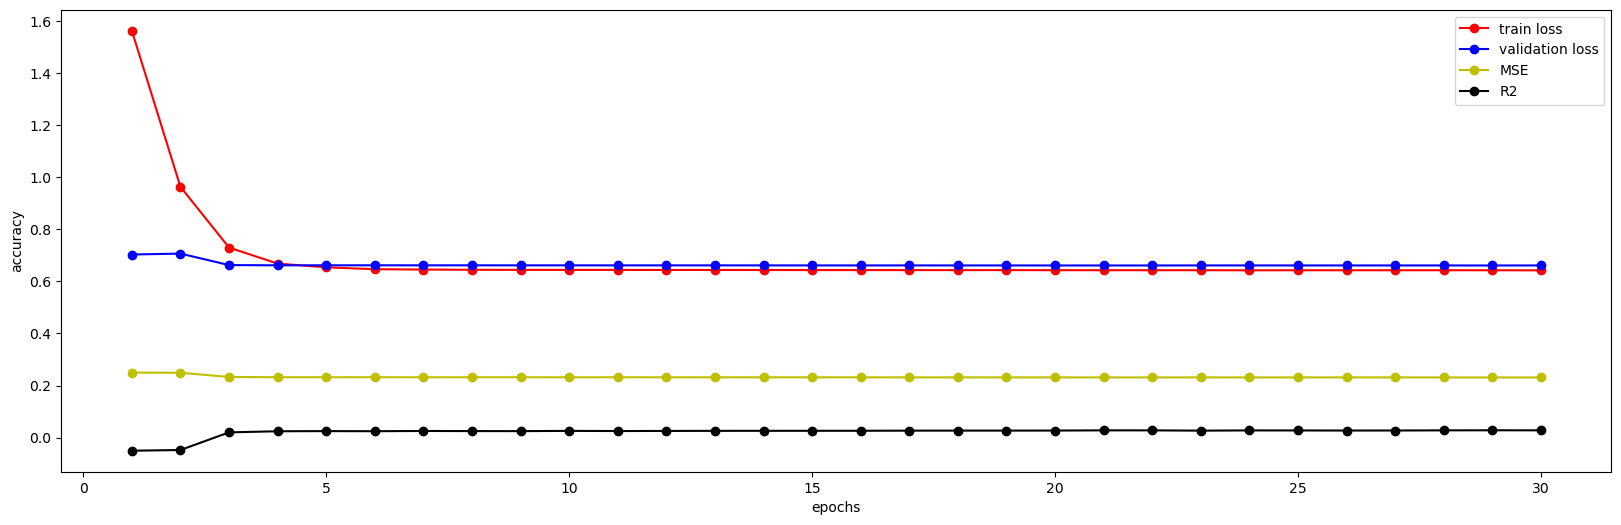

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))
plt.plot(x_axis, avg_train_loss_set,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(x_axis, val_loss_set,'ob-')
plt.plot(x_axis, mse_arr,'oy-')
plt.plot(x_axis, r2_arr,'ok-')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train loss', 'validation loss', 'MSE', 'R2'])

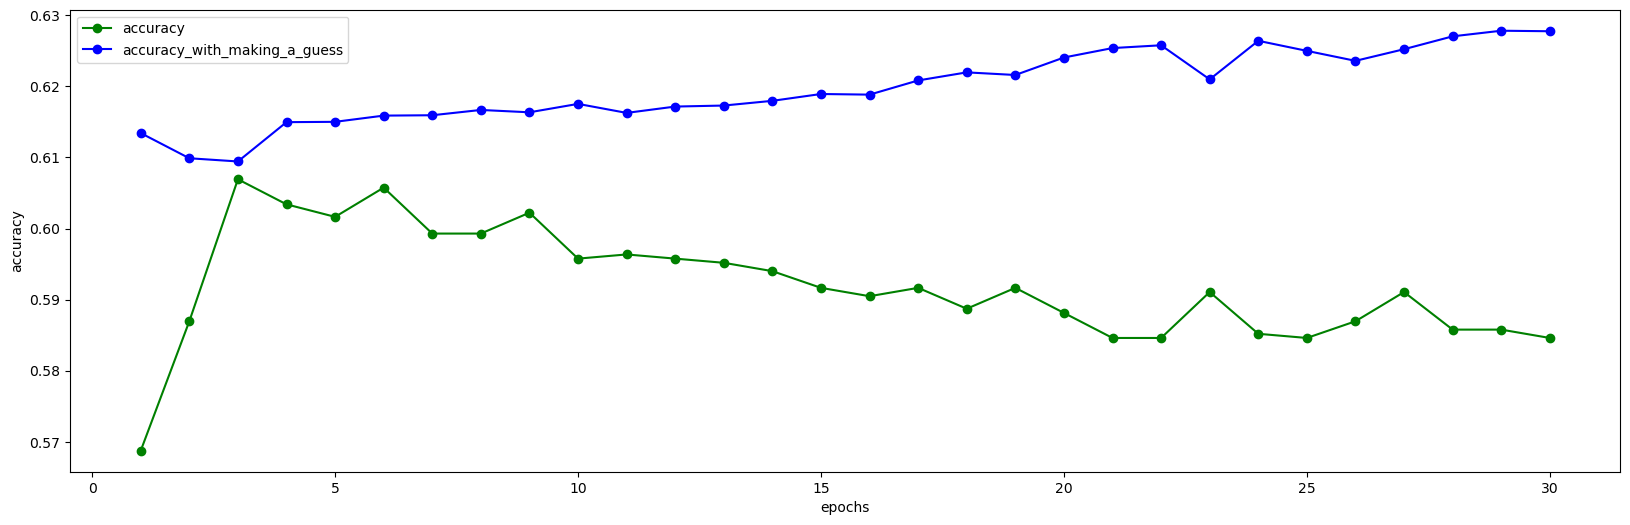

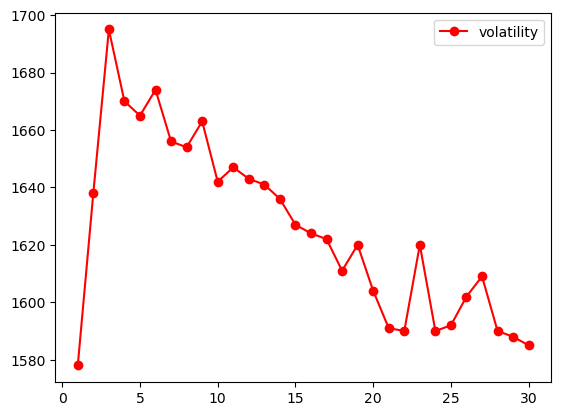

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))

plt.plot(x_axis, acc_arr,'og-')
plt.plot(x_axis, acc_with_making_a_guess_arr,'ob-')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["accuracy", "accuracy_with_making_a_guess"])
plt.show()

plt.plot(x_axis, volatility_arr,'or-')
plt.legend(["volatility"])



In [23]:

epochs = 5
lambda_ = 0.01
acc_coeff = 0.03
avg_train_loss_set = []
val_loss_set = []
array_for_outcomes = np.array([])
mse_arr = []
r2_arr = []
x_axis = []
acc_arr = []
acc_with_making_a_guess_arr = []
volatility_arr = []
 # Training loop
#L2regularization on 100 epochs

for l in range(20):
    lambda_ = 0.001+ l*0.001
    feature_dim = data.shape[1]
    model = ProbabilityEstimatorNN(feature_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()
    num_samples_train = X_train.shape[0]
    print(epochs)
    avg_train_loss_set.append(train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_))

    val_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
    acc, acc_with_making_a_guess, volatility = accuracy(flat_array, acc_coeff )

    
    val_loss_set.append(val_loss)
    #array_for_outcomes = np.vstack([flat_array, array_for_outcomes])
    mse_arr.append(mse)
    r2_arr.append(r2)
    x_axis.append(lambda_)
    
    volatility_arr.append(volatility)
    acc_with_making_a_guess_arr.append(acc_with_making_a_guess)
    acc_arr.append(acc)

5
0
1
2
3
4
Validation accuracy of normalized model: 0.5658
[0 1]
acc on making a guess: 0.630648330058939
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5582
[0 1]
acc on making a guess: 0.628722700198544
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5793
[0 1]
acc on making a guess: 0.6296296296296295
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5758
[0 1]
acc on making a guess: 0.6278026905829597
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5881
[0 1]
acc on making a guess: 0.6275862068965518
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5905
[0 1]
acc on making a guess: 0.6226765799256505
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5928
[0 1]
acc on making a guess: 0.617125382262997
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5899
[0 1]
acc on making a guess: 0.6167076167076168
5
0
1
2
3
4
Validation accuracy of normalized model: 0.6016
[0 1]
acc on making a guess: 0.6146458583433373
5
0
1
2
3
4
Validation accuracy

In [24]:
print(acc_arr)

[np.float64(0.5658049353701528), np.float64(0.5581668625146886), np.float64(0.5793184488836662), np.float64(0.5757931844888367), np.float64(0.5881316098707403), np.float64(0.5904817861339601), np.float64(0.5928319623971798), np.float64(0.5898942420681551), np.float64(0.6016451233842538), np.float64(0.5987074030552292), np.float64(0.6039952996474736), np.float64(0.6028202115158637), np.float64(0.6075205640423031), np.float64(0.6081081081081081), np.float64(0.6086956521739131), np.float64(0.6092831962397179), np.float64(0.6086956521739131), np.float64(0.6098707403055229), np.float64(0.6098707403055229), np.float64(0.6098707403055229)]


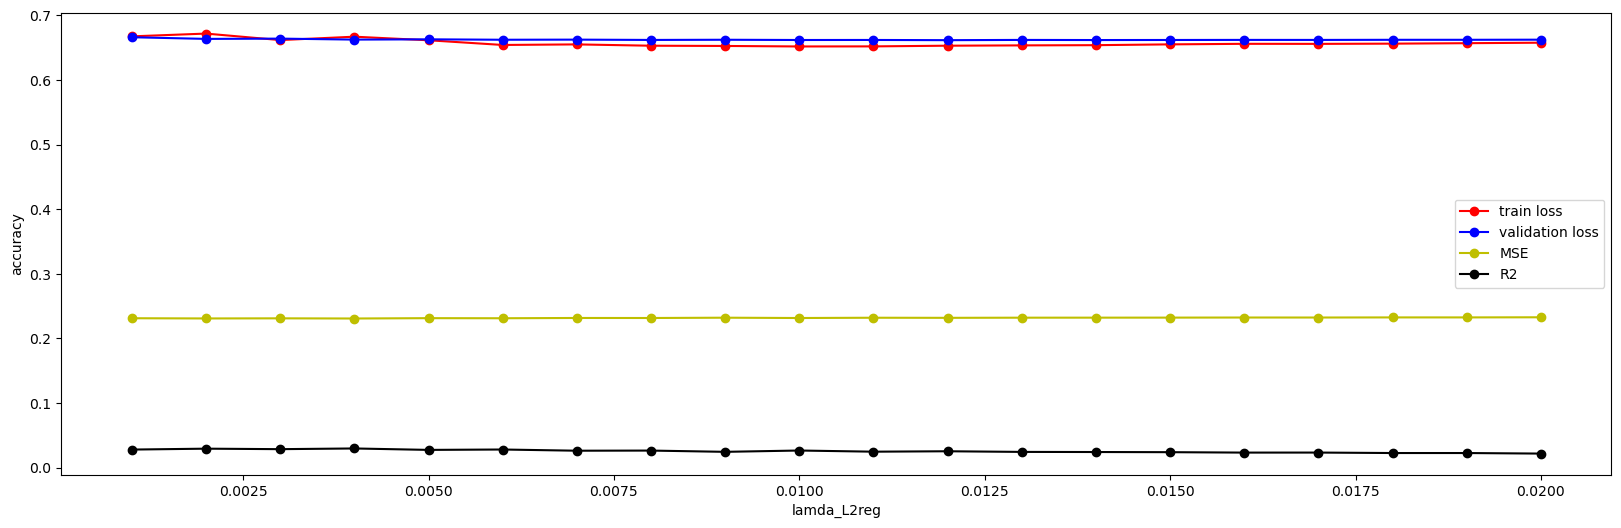

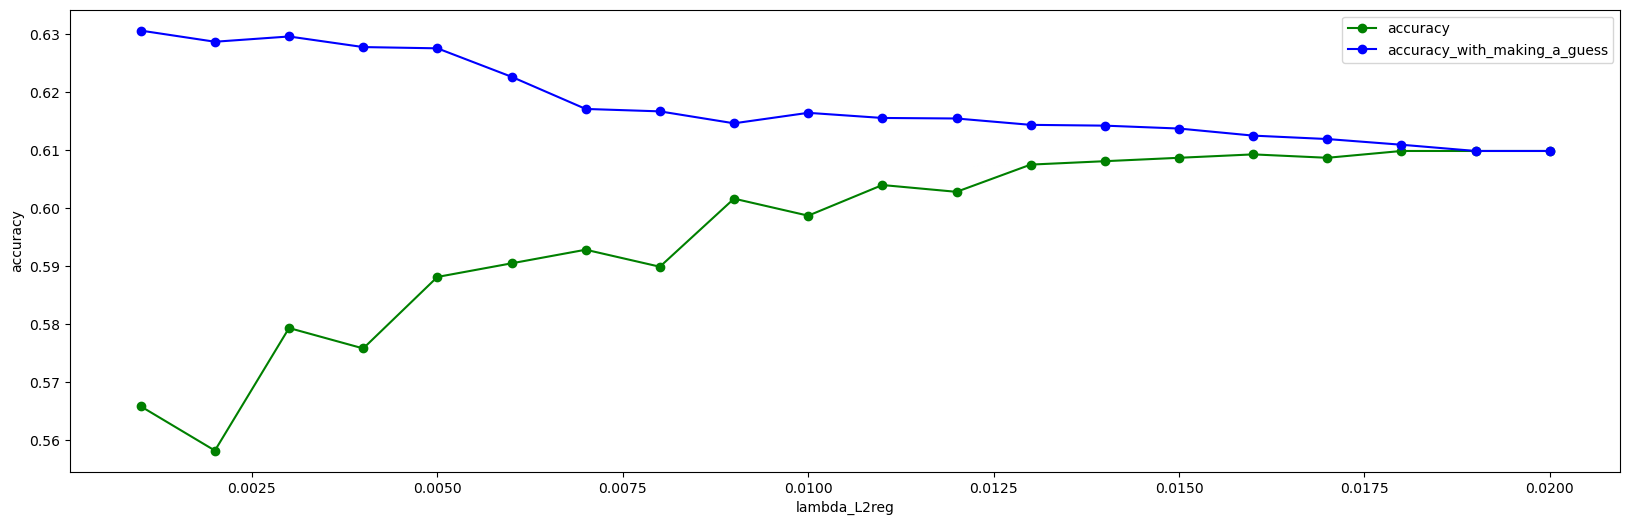

Text(0, 0.5, 'volatility')

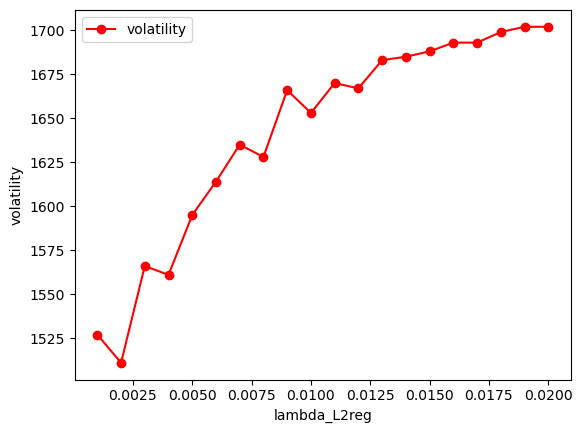

In [25]:

plt.figure(figsize=(20,6))
plt.plot(x_axis, avg_train_loss_set,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(x_axis, val_loss_set,'ob-')
plt.plot(x_axis, mse_arr,'oy-')
plt.plot(x_axis, r2_arr,'ok-')
plt.xlabel('lamda_L2reg')
plt.ylabel('accuracy')
plt.legend(['train loss', 'validation loss', 'MSE', 'R2'])

plt.figure(figsize=(20,6))

plt.plot(x_axis, acc_arr,'og-')
plt.plot(x_axis, acc_with_making_a_guess_arr,'ob-')

plt.xlabel('lambda_L2reg')
plt.ylabel('accuracy')
plt.legend(["accuracy", "accuracy_with_making_a_guess"])
plt.show()

plt.plot(x_axis, volatility_arr,'or-')
plt.legend(["volatility"])
plt.xlabel('lambda_L2reg')
plt.ylabel('volatility')

In [29]:

epochs = 5
lambda_ = 0.01
avg_train_loss_set = []
val_loss_set = []
array_for_outcomes = np.array([])
mse_arr = []
r2_arr = []
x_axis = []
acc_arr = []
acc_with_making_a_guess_arr = []
volatility_arr = []
 # Training loop
 #lambda reg on 1000 eepochs

for l in range(20):
    lambda_ = 0.001+ l*0.001
    feature_dim = data.shape[1]
    model = ProbabilityEstimatorNN(feature_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()
    num_samples_train = X_train.shape[0]
    print(epochs)
    avg_train_loss_set.append(train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_))

    val_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
    acc, acc_with_making_a_guess, volatility = accuracy(flat_array, acc_coeff )
    val_loss_set.append(val_loss)
    #array_for_outcomes = np.vstack([flat_array, array_for_outcomes])
    mse_arr.append(mse)
    r2_arr.append(r2)
    x_axis.append(lambda_)
    
    volatility_arr.append(volatility)
    acc_with_making_a_guess_arr.append(acc_with_making_a_guess)
    acc_arr.append(acc)

5
0
1
2
3
4
Validation accuracy of normalized model: 0.5470
[0 1]
acc on making a guess: 0.6269360269360269
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5517
[0 1]
acc on making a guess: 0.6302013422818792
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5717
[0 1]
acc on making a guess: 0.6277419354838709
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5717
[0 1]
acc on making a guess: 0.6277419354838709
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5781
[0 1]
acc on making a guess: 0.6279514996809189
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5864
[0 1]
acc on making a guess: 0.6241400875547217
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5875
[0 1]
acc on making a guess: 0.6169031462060457
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5905
[0 1]
acc on making a guess: 0.6207535515750463
5
0
1
2
3
4
Validation accuracy of normalized model: 0.6022
[0 1]
acc on making a guess: 0.6163559831629585
5
0
1
2
3
4
Validation accur

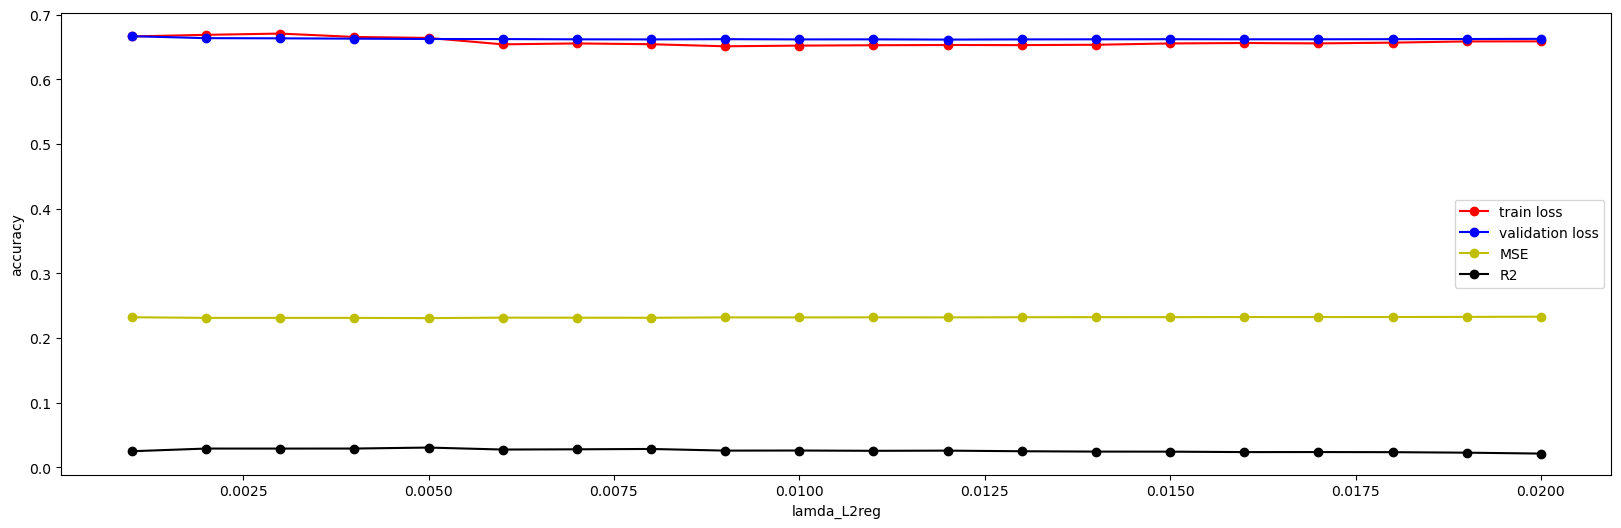

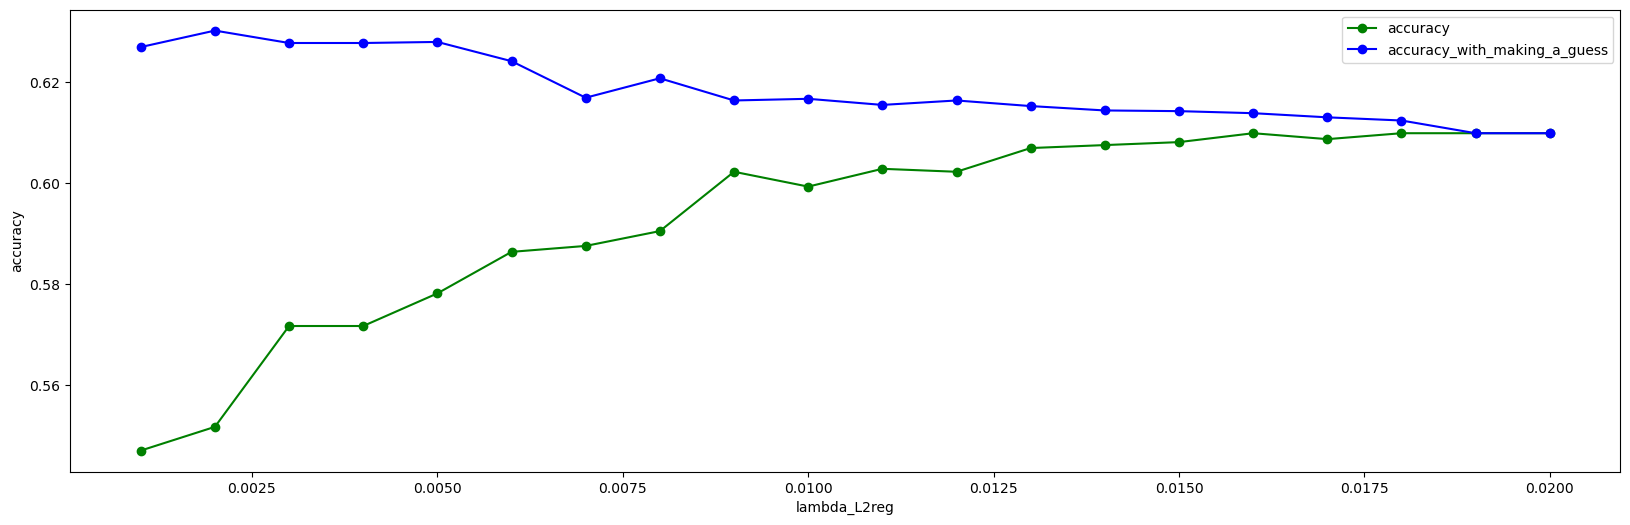

Text(0, 0.5, 'volatility')

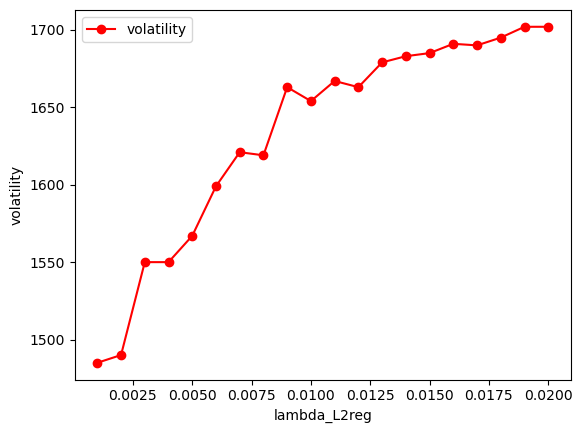

In [30]:


plt.figure(figsize=(20,6))
plt.plot(x_axis, avg_train_loss_set,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(x_axis, val_loss_set,'ob-')
plt.plot(x_axis, mse_arr,'oy-')
plt.plot(x_axis, r2_arr,'ok-')
plt.xlabel('lamda_L2reg')
plt.ylabel('accuracy')
plt.legend(['train loss', 'validation loss', 'MSE', 'R2'])

plt.figure(figsize=(20,6))

plt.plot(x_axis, acc_arr,'og-')
plt.plot(x_axis, acc_with_making_a_guess_arr,'ob-')

plt.xlabel('lambda_L2reg')
plt.ylabel('accuracy')
plt.legend(["accuracy", "accuracy_with_making_a_guess"])
plt.show()

plt.plot(x_axis, volatility_arr,'or-')
plt.legend(["volatility"])
plt.xlabel('lambda_L2reg')
plt.ylabel('volatility')

In [32]:
optimal_acc = x_axis[np.argmax(acc_arr)]
optimal_acc


0.016

In [33]:
optimal_r2 = x_axis[np.argmax(r2_arr)]
optimal_r2

0.005

In [35]:

epochs = 5
lambda_ = 0.0075
avg_train_loss_set = []
val_loss_set = []
array_for_outcomes = np.array([])
mse_arr = []
r2_arr = []
x_axis = []
acc_arr = []
acc_with_making_a_guess_arr = []
volatility_arr = []
 # Training loop
 #decorel hypertuning for 1000 epochs

for l in range(10):
    lambda_decorr = 0.1+ l*0.1
    feature_dim = data.shape[1]
    model = ProbabilityEstimatorNN(feature_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()
    num_samples_train = X_train.shape[0]
    print(epochs)
    avg_train_loss_set.append(train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_))

    val_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
    acc, acc_with_making_a_guess, volatility = accuracy(flat_array, acc_coeff )
    val_loss_set.append(val_loss)
    #array_for_outcomes = np.vstack([flat_array, array_for_outcomes])
    mse_arr.append(mse)
    r2_arr.append(r2)
    x_axis.append(lambda_decorr)
    
    volatility_arr.append(volatility)
    acc_with_making_a_guess_arr.append(acc_with_making_a_guess)
    acc_arr.append(acc)

5
0
1
2
3
4
Validation accuracy of normalized model: 0.5911
[0 1]
acc on making a guess: 0.6179361179361179
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5917
[0 1]
acc on making a guess: 0.6166564605021433
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5899
[0 1]
acc on making a guess: 0.6170866625691457
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5946
[0 1]
acc on making a guess: 0.6170731707317073
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5964
[0 1]
acc on making a guess: 0.6147789218655361
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5905
[0 1]
acc on making a guess: 0.6184615384615385
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5993
[0 1]
acc on making a guess: 0.6148282097649186
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5975
[0 1]
acc on making a guess: 0.6163636363636363
5
0
1
2
3
4
Validation accuracy of normalized model: 0.5922
[0 1]
acc on making a guess: 0.6180257510729614
5
0
1
2
3
4
Validation accur

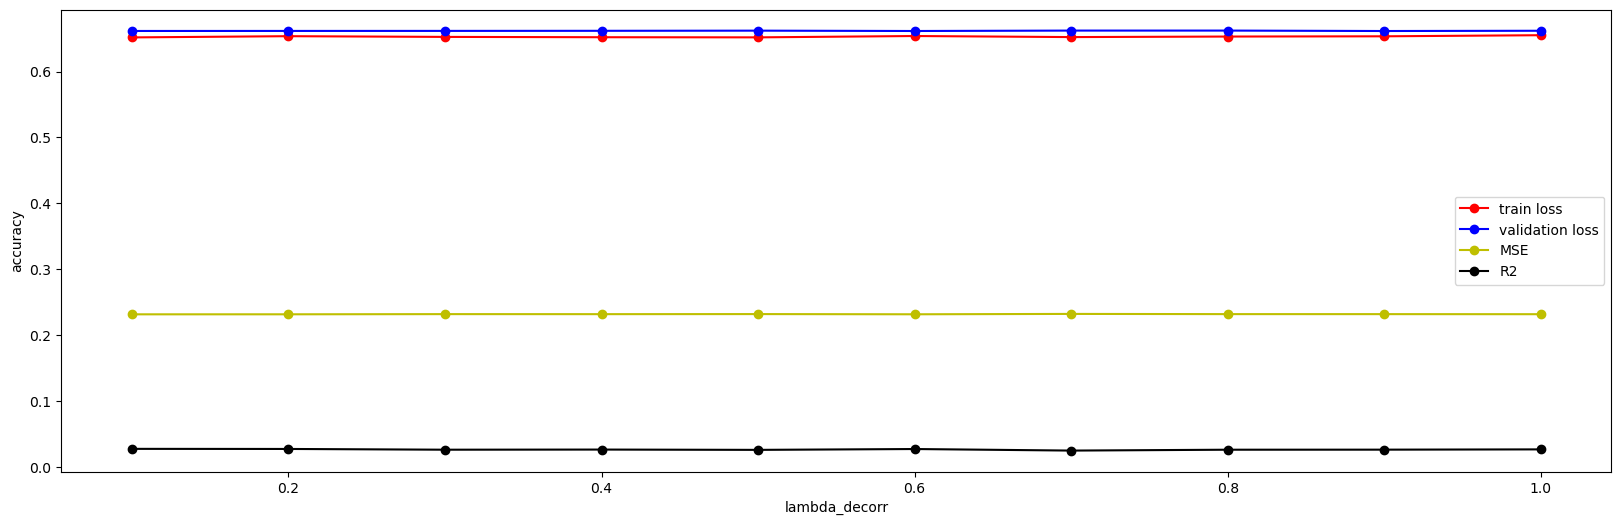

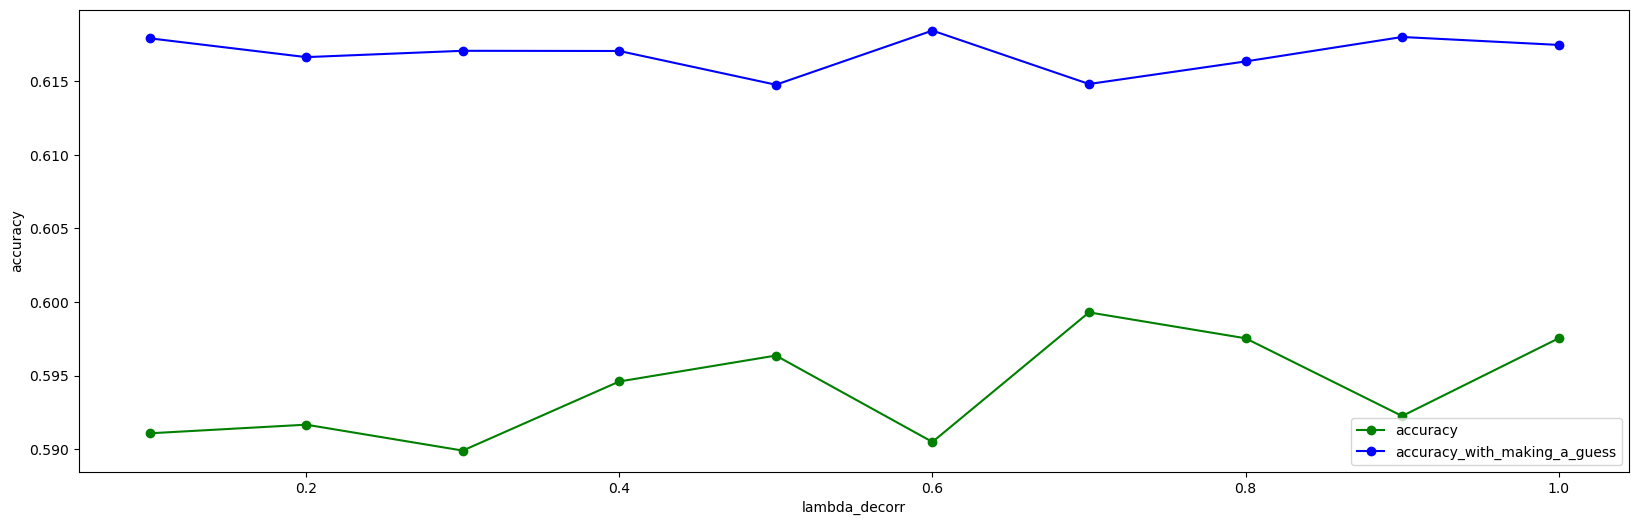

Text(0, 0.5, 'volatility')

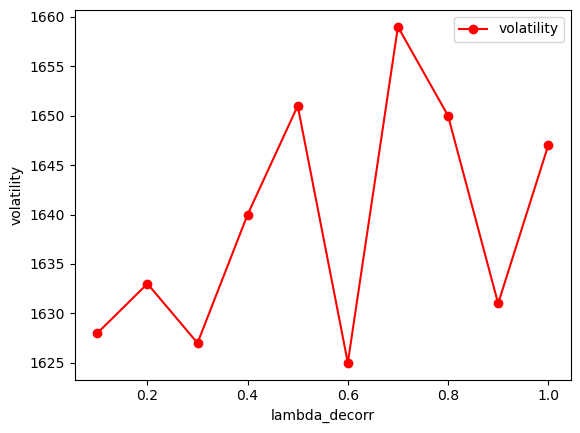

In [36]:


plt.figure(figsize=(20,6))
plt.plot(x_axis, avg_train_loss_set,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(x_axis, val_loss_set,'ob-')
plt.plot(x_axis, mse_arr,'oy-')
plt.plot(x_axis, r2_arr,'ok-')
plt.xlabel('lambda_decorr')
plt.ylabel('accuracy')
plt.legend(['train loss', 'validation loss', 'MSE', 'R2'])

plt.figure(figsize=(20,6))

plt.plot(x_axis, acc_arr,'og-')
plt.plot(x_axis, acc_with_making_a_guess_arr,'ob-')

plt.xlabel('lambda_decorr')
plt.ylabel('accuracy')
plt.legend(["accuracy", "accuracy_with_making_a_guess"])
plt.show()

plt.plot(x_axis, volatility_arr,'or-')
plt.legend(["volatility"])
plt.xlabel('lambda_decorr')
plt.ylabel('volatility')

In [37]:
#interestingly conv nn has 60 cca acc rate 
class ConvEstimatorNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        # CNN expects (batch, channels=1, features)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # compute output dimension after convs:
        # features stay the same because of padding
        conv_output_dim = 32 * input_dim  

        self.fc1 = nn.Linear(conv_output_dim, 64)
        self.output = nn.Linear(64, 1)

        # Initialize weights (optional)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.uniform_(self.output.weight, -0.1, 0.1)

    def forward(self, x):
        # x: (batch, features)
        x = x.unsqueeze(1)      # -> (batch, 1, features)

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        x = x.flatten(start_dim=1)   # -> (batch, 32*features)

        x = F.relu(self.fc1(x))
        x = self.output(x)           # logits
        return x


In [41]:

epochs = 5
lambda_ = 0.0075
lambda_decorr = 0.3
avg_train_loss_set = []
val_loss_set = []
array_for_outcomes = np.array([])
mse_arr = []
r2_arr = []
x_axis = []
acc_arr = []
acc_with_making_a_guess_arr = []
volatility_arr = []
 # Training loop


feature_dim = data.shape[1]
model = ConvEstimatorNN(feature_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
num_samples_train = X_train.shape[0]
avg_train_loss_set.append(train(model, optimizer, criterion, num_samples_train, lambda_decorr, epochs, train_loader, lambda_))

val_loss, flat_array, mse, r2 = predict(model, criterion, val_loader)
print(flat_array)
val_loss_set.append(val_loss)
#array_for_outcomes = np.vstack([flat_array, array_for_outcomes])
mse_arr.append(mse)
r2_arr.append(r2)
for sensitivity in range(5):
    sens = sensitivity*0.03
    acc, acc_with_making_a_guess, volatility = accuracy(flat_array, sens )
    x_axis.append(sensitivity*0.03)
    volatility_arr.append(volatility)
    acc_with_making_a_guess_arr.append(acc_with_making_a_guess)
    acc_arr.append(acc)

0
1
2
3
4
[0.5826224  0.5326803  0.5179054  ... 0.5282862  0.5742463  0.56163484]
Validation accuracy of normalized model: 0.6093
[0 1]
acc on making a guess: 0.6092831962397179
Validation accuracy of normalized model: 0.4965
[0 1]
acc on making a guess: 0.6401515151515151
Validation accuracy of normalized model: 0.3702
[0 1]
acc on making a guess: 0.6687898089171974
Validation accuracy of normalized model: 0.2479
[0 1]
acc on making a guess: 0.670906200317965
Validation accuracy of normalized model: 0.1445
[0 1]
acc on making a guess: 0.7109826589595376


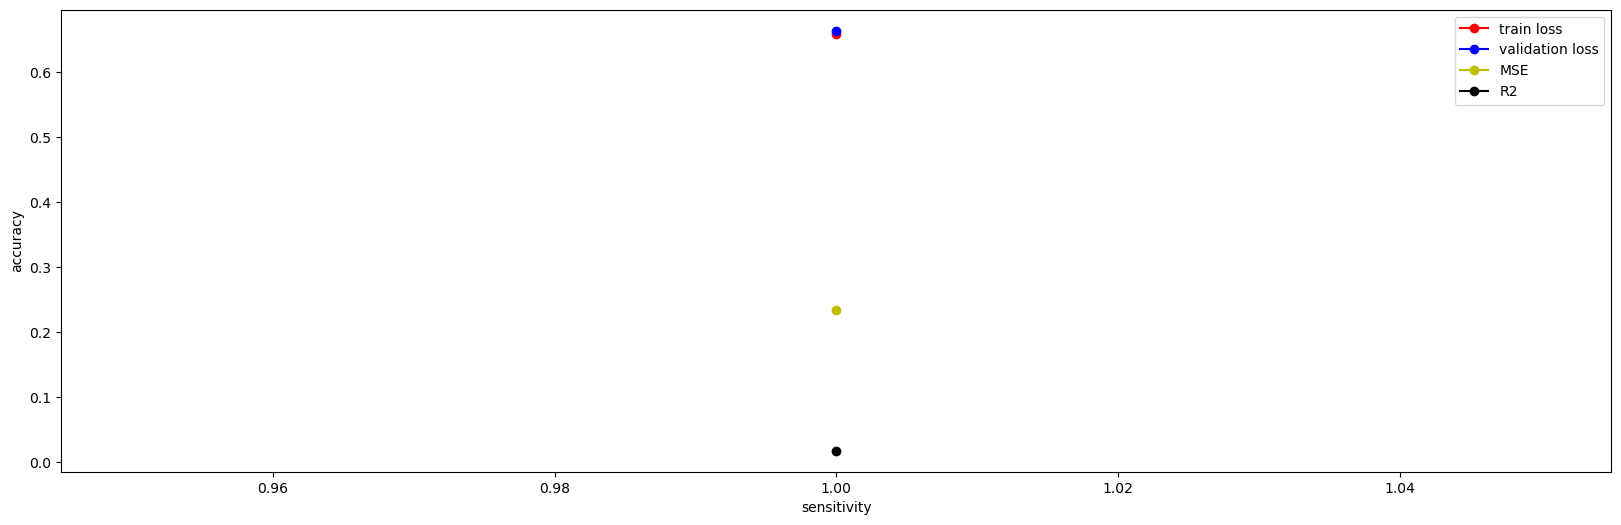

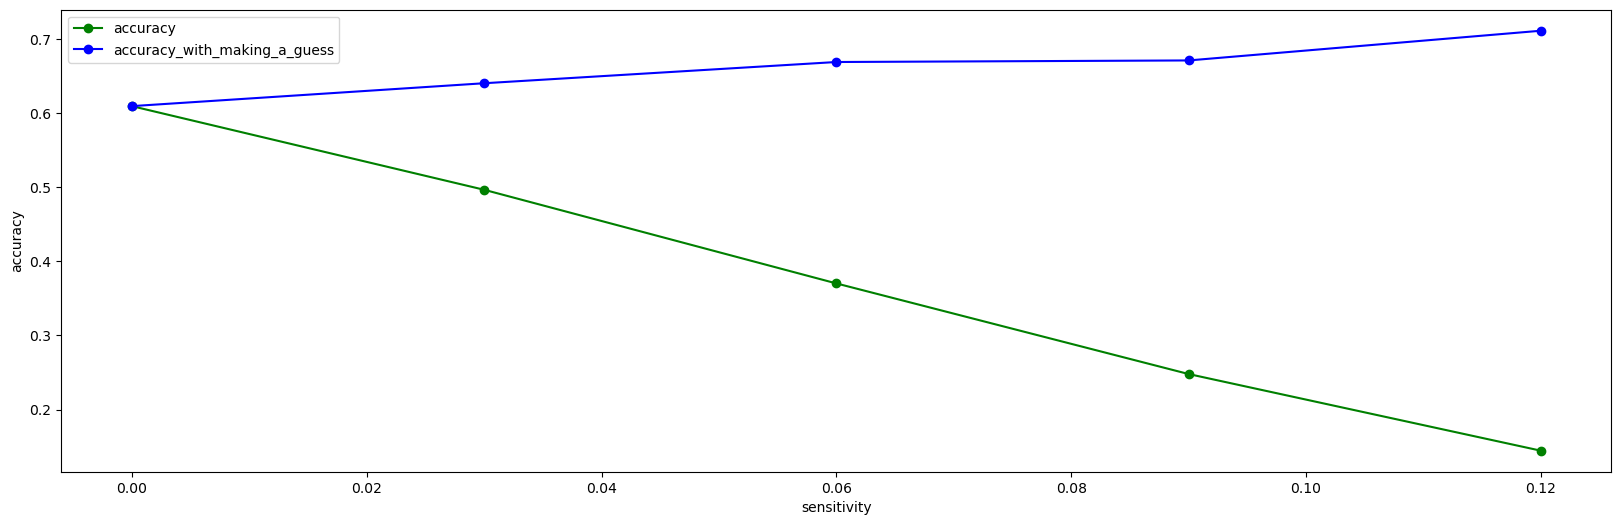

Text(0, 0.5, 'volatility')

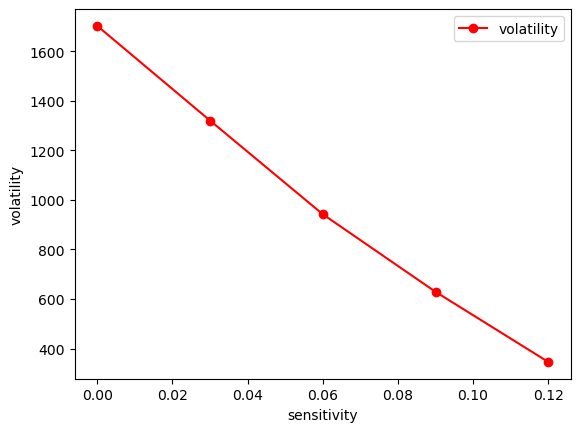

In [43]:
plt.figure(figsize=(20,6))
plt.plot(1, avg_train_loss_set,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(1, val_loss_set,'ob-')
plt.plot(1, mse_arr,'oy-')
plt.plot(1, r2_arr,'ok-')
plt.xlabel('sensitivity')
plt.ylabel('accuracy')
plt.legend(['train loss', 'validation loss', 'MSE', 'R2'])

plt.figure(figsize=(20,6))

plt.plot(x_axis, acc_arr,'og-')
plt.plot(x_axis, acc_with_making_a_guess_arr,'ob-')

plt.xlabel('sensitivity')
plt.ylabel('accuracy')
plt.legend(["accuracy", "accuracy_with_making_a_guess"])
plt.show()

plt.plot(x_axis, volatility_arr,'or-')
plt.legend(["volatility"])
plt.xlabel('sensitivity')
plt.ylabel('volatility')